### Demonstration of Gauge Invariance of Action

The purpose of this notebook is to demonstrate the gauge invariance of the action, allow the choice dg = 0 to be made.

In [1]:
import sympy

sympy.init_printing()

In [2]:
syms = sympy.symbols("r psi theta phi")
r, psi, theta, phi = syms

In [3]:
L = sympy.symbols("L")  # AdS length scale
r_0 = sympy.symbols("r_0")

In [4]:
# spherical part of the metric
g = sympy.Function('g')(r)
dg = sympy.diff(g, r)
ddg = sympy.diff(dg, r)

# solution
g_sol = r ** 2 + r_0 ** 2
dg_sol = sympy.diff(g_sol, r)
ddg_sol = sympy.diff(dg_sol, r)

In [5]:
# radial part of the metric
f = sympy.Function('f')(r)
df = sympy.diff(f, r)
ddf = sympy.diff(df, r)

# solution
f_sol = (L ** 2 + r ** 2 + 2 * r_0 ** 2) / L ** 2
df_sol = sympy.diff(f_sol, r)
ddf_sol = sympy.diff(df_sol, r)

In [6]:
# gauge field
Phi = sympy.Function('Phi')(r)
dPhi = sympy.diff(Phi, r)
ddPhi = sympy.diff(dPhi, r)

ddPhi_sol = (8 * Phi - dPhi * df * g - dPhi * dg * f) / (2 * f * g)

In [7]:
delta_f = sympy.Function('delta_f')(r)

In [8]:
delta_g = sympy.Function('delta_g')(r)
ddelta_g = sympy.diff(delta_g, r)

In [9]:
delta_Phi = sympy.Function('delta_Phi')(r)
ddelta_Phi = sympy.diff(delta_Phi, r)

### Lie derivatives

In [10]:
xi = sympy.Function('xi')(r)
dxi = sympy.diff(xi, r)

In [11]:
dlie_delta_f = xi * df - 2 * f * dxi
dlie_delta_f

In [12]:
dlie_delta_g = dg * xi
dlie_delta_g

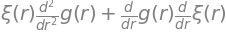

In [13]:
dlie_ddelta_g = sympy.diff(dlie_delta_g)
dlie_ddelta_g

In [14]:
dlie_delta_Phi = xi * dPhi
dlie_delta_Phi

Compute the Lie derivative of Phi", substituting the expression for Phi".

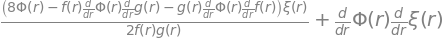

In [15]:
dlie_ddelta_Phi = xi * ddPhi_sol + dPhi * dxi
dlie_ddelta_Phi

### q part of action

Keep track of terms separately.

In [16]:
delta_f_terms = []
delta_g_terms = []
ddelta_g_terms = []
delta_Phi_terms = []
ddelta_Phi_terms = []

There are 7 terms.

##### Term 1

In [17]:
term1 = 3 * L ** 2 * sympy.sqrt(f * g) * ddelta_Phi ** 2 / 4
term1

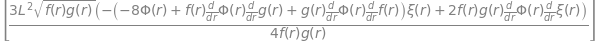

In [18]:
ddelta_Phi_terms.append(sympy.simplify(3 * L ** 2 * sympy.sqrt(f * g) * 2 * dlie_ddelta_Phi / 4))
ddelta_Phi_terms

##### Term 2

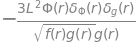

In [19]:
term2 = -3 * L ** 2 * Phi * delta_Phi * delta_g / (g * sympy.sqrt(f * g))
term2

In [20]:
delta_g_terms.append((-3 * L ** 2 * Phi) / (g * sympy.sqrt(f * g)) * dlie_delta_Phi)
delta_Phi_terms.append((-3 * L ** 2 * Phi) / (g * sympy.sqrt(f * g)) * dlie_delta_g)

##### Term 3

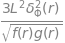

In [21]:
term3 = 3 * L ** 2 * delta_Phi ** 2 / sympy.sqrt(f * g)
term3

In [22]:
delta_Phi_terms.append(3 * L ** 2 * 2 * dlie_delta_Phi / sympy.sqrt(f * g))

##### Term 4

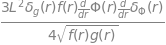

In [23]:
term4 = 3 * L ** 2 * delta_g * f * dPhi * ddelta_Phi / (4 * sympy.sqrt(f * g))
term4

In [24]:
ddelta_Phi_terms.append(sympy.simplify((3 * L ** 2 * f * dPhi) / (4 * sympy.sqrt(f * g)) * dlie_delta_g))
delta_g_terms.append(sympy.simplify((3 * L ** 2 * f * dPhi) / (4 * sympy.sqrt(f * g)) * dlie_ddelta_Phi))

##### Term 5

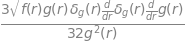

In [25]:
term5 = 3 * sympy.sqrt(f * g) * delta_g * ddelta_g * dg / (32 * g ** 2)
term5

In [26]:
delta_g_terms.append((3 * sympy.sqrt(f * g) * dg) / (32 * g ** 2) * dlie_ddelta_g)
ddelta_g_terms.append((3 * sympy.sqrt(f * g) * dg) / (32 * g ** 2) * dlie_delta_g)

##### Term 6

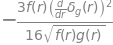

In [27]:
term6 = -3 * f * ddelta_g ** 2 / (16 * sympy.sqrt(f * g))
term6

In [28]:
ddelta_g_terms.append((-3 * f) / (16 * sympy.sqrt(f * g)) * 2 * dlie_ddelta_g)

##### Term 7

In [29]:
Phi_s, C_s = sympy.symbols("Phi_s C_s")
Phi_s_sol = (f * g * dPhi ** 2 - C_s) / 4

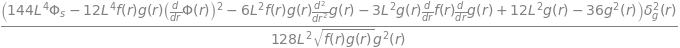

In [30]:
fac1 = 48 * L ** 4 * Phi_s - 4 * L ** 4 * f * g * dPhi ** 2 - 2 * L ** 2 * f * g * ddg - L ** 2 * g * df * dg + 4 * L ** 2 * g - 12 * g ** 2
term7 = 3 * fac1 * delta_g ** 2 / (128 * L ** 2 * g ** 2 * sympy.sqrt(f * g))
term7

In [31]:
delta_g_terms.append(3 * fac1 * 2 * dlie_delta_g / (128 * L ** 2 * sympy.sqrt(f * g ** 5)))

### f part of action

There are 5 terms.

##### Term 1

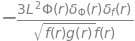

In [32]:
term1 = -3 * L ** 2 * Phi * delta_Phi * delta_f / (sympy.sqrt(f * g) * f)
term1

In [33]:
delta_f_terms.append((-3 * L ** 2 * Phi) / (sympy.sqrt(f * g) * f) * dlie_delta_Phi)
delta_Phi_terms.append((-3 * L ** 2 * Phi) / (sympy.sqrt(f * g) * f) * dlie_delta_f)

##### Term 2

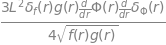

In [34]:
term2 = 3 * L ** 2 * delta_f * g * dPhi * ddelta_Phi / (4 * sympy.sqrt(f * g))
term2

In [35]:
delta_f_terms.append(sympy.simplify((3 * L ** 2 * g * dPhi) / (4 * sympy.sqrt(f * g)) * dlie_ddelta_Phi))
ddelta_Phi_terms.append(sympy.simplify((3 * L ** 2 * g * dPhi) / (4 * sympy.sqrt(f * g)) * dlie_delta_f))

##### Term 3

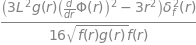

In [36]:
term3 = (3 * L ** 2 * g * dPhi ** 2 - 3 * r ** 2) * delta_f ** 2 / (16 * sympy.sqrt(f * g) * f)
term3

In [37]:
delta_f_terms.append((3 * L ** 2 * g * dPhi ** 2 - 3 * r ** 2) * 2 * dlie_delta_f / (16 * sympy.sqrt(f * g) * f))

##### Term 4

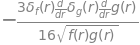

In [38]:
term4 = -3 * delta_f * ddelta_g * dg / (16 * sympy.sqrt(f * g))
term4

In [39]:
ddelta_g_terms.append((-3 * dg) / (16 * sympy.sqrt(f * g)) * dlie_delta_f)
delta_f_terms.append((-3 * dg) / (16 * sympy.sqrt(f * g)) * dlie_ddelta_g)

##### Term 5

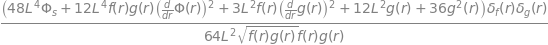

In [40]:
fac2 = 16 * L ** 4 * Phi_s + 4 * L ** 4 * f * g * dPhi ** 2 + L ** 2 * f * dg ** 2 + 4 * L ** 2 * g + 12 * g ** 2
term5 = 3 * fac2 * delta_f * delta_g / (64 * L ** 2 * f * g * sympy.sqrt(f * g))
term5

In [41]:
delta_g_terms.append((3 * fac2) / (64 * L ** 2 * sympy.sqrt(f ** 3 * g ** 3)) * dlie_delta_f)
delta_f_terms.append((3 * fac2) / (64 * L ** 2 * sympy.sqrt(f ** 3 * g ** 3)) * dlie_delta_g)

### Total

##### f terms

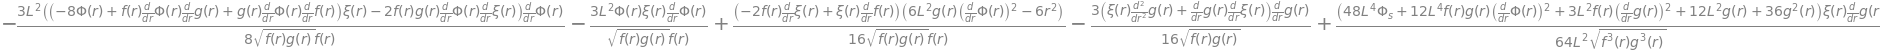

In [42]:
total_delta_f_term = sum(delta_f_terms)
total_delta_f_term

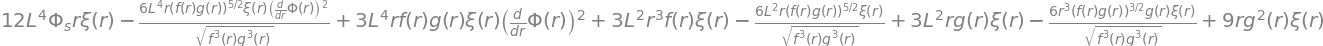

In [43]:
f_term_num = sympy.fraction(total_delta_f_term.subs({dg: dg_sol, ddg: ddg_sol, df: df_sol}).simplify())[0] / sympy.sqrt(f ** 3 * g ** 3)
f_term_num.simplify()

Substitute Phi squared.

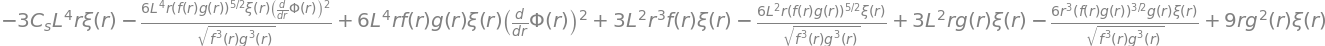

In [44]:
f_term_num.subs({Phi_s: Phi_s_sol}).simplify()

In [45]:
f_term_num = -3 * C_s * L ** 4 * r * xi + 3 * L ** 2 * r ** 3 * f * xi - 6 * L ** 2 * r * f * g * xi + 3 * L ** 2 * r * g * xi - 6 * r ** 3 * g * xi + 9 * r * g ** 2 * xi
f_term_num

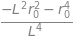

In [46]:
C_s_sol = -(L ** 2 * r_0 ** 2 + r_0 ** 4) / L ** 4
C_s_sol

In [47]:
f_term_num.subs({C_s: C_s_sol, f: f_sol, g: g_sol}).simplify()

##### g terms

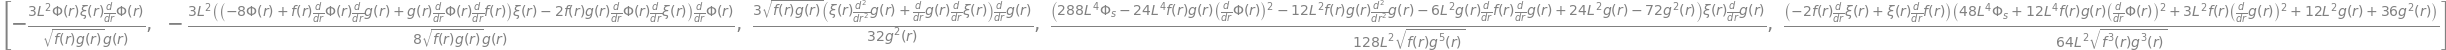

In [48]:
delta_g_terms

Multiply through by f^1.5 * g^2.5 to simplify.

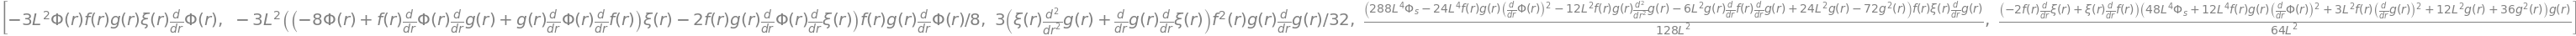

In [49]:
delta_g_terms = [
    -3 * L ** 2 * Phi * xi * dPhi * g * f,
    -3 * L ** 2 * dPhi * g * f * ((-8 * Phi + f * dPhi * dg + g * dPhi * df) * xi - 2 * f * g * dPhi * dxi) / 8,
    3 * g * f ** 2 * (xi * ddg + dg * dxi) * dg / 32,
    (288 * L ** 4 * Phi_s - 24 * L ** 4 * f * g * dPhi ** 2 - 12 * L ** 2 * f * g * ddg - 6 * L ** 2 * g * df * dg + 24 * L ** 2 * g - 72 * g ** 2) * xi * dg * f / (128 * L ** 2),
    g * (-2 * f * dxi + xi * df) * (48 * L ** 4 * Phi_s + 12 * L ** 4 * f * g * dPhi ** 2 + 3 * L ** 2 * f * dg ** 2 + 12 * L ** 2 * g + 36 * g ** 2) / (64 * L ** 2)
]
delta_g_terms

Integrate the dg' term by parts.

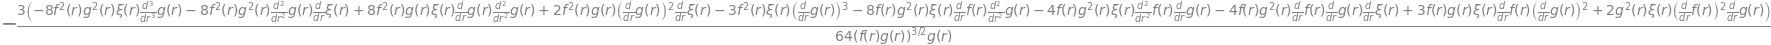

In [50]:
extra_delta_g_terms = -sympy.diff(sum(ddelta_g_terms), r).simplify()
extra_delta_g_terms

Again, multiply through by f^1.5 * g^2.5 to simplify.

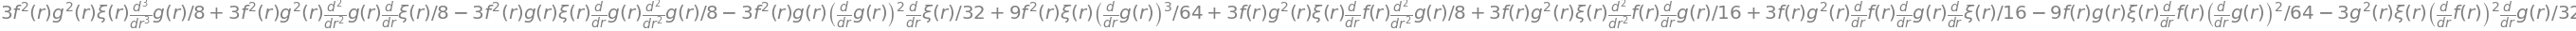

In [51]:
extra_delta_g_terms = sympy.fraction(extra_delta_g_terms)[0] / 64
extra_delta_g_terms

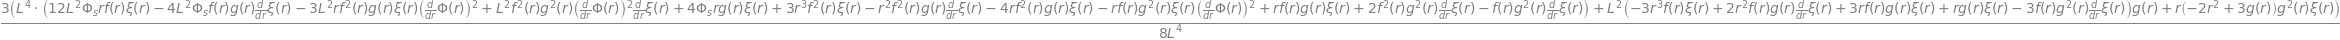

In [52]:
total_g_term = (sum(delta_g_terms) + extra_delta_g_terms).subs({dg: dg_sol, ddg: ddg_sol, df: df_sol, ddf: ddf_sol}).expand()
total_g_term.simplify()

In [53]:
total_g_term.subs({Phi_s: Phi_s_sol}).subs({C_s: C_s_sol, f: f_sol, g: g_sol}).simplify()

##### Phi terms

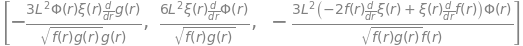

In [54]:
delta_Phi_terms

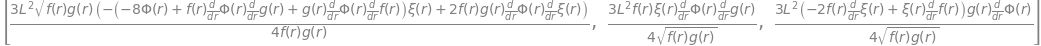

In [55]:
ddelta_Phi_terms

In [56]:
total_phi_term = (sum(delta_Phi_terms) - sympy.diff(sum(ddelta_Phi_terms), r)).simplify()
total_phi_term